In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("dataset_sdn-.csv")

In [267]:
list(df.columns)

['dt',
 'switch',
 'src',
 'dst',
 'pktcount',
 'bytecount',
 'dur',
 'dur_nsec',
 'tot_dur',
 'flows',
 'packetins',
 'pktperflow',
 'byteperflow',
 'pktrate',
 'Pairflow',
 'Protocol',
 'port_no',
 'tx_bytes',
 'rx_bytes',
 'tx_kbps',
 'rx_kbps',
 'tot_kbps',
 'label']

In [268]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [269]:
df.dtypes

dt               int64
switch           int64
src             object
dst             object
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol        object
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps        float64
tot_kbps       float64
label            int64
dtype: object

In [270]:
cat_cols = list(n for n in df.columns if df[n].dtype == "object")
cat_cols

['src', 'dst', 'Protocol']

In [271]:
cardinality_of_cat_cols = {n:len(list(df[n].unique())) for n in cat_cols}
cardinality_of_cat_cols

{'src': 19, 'dst': 18, 'Protocol': 3}

In [272]:
name_of_cat_cols = {n:list(df[n].unique()) for n in cat_cols}
name_of_cat_cols

{'src': ['10.0.0.1',
  '10.0.0.2',
  '10.0.0.4',
  '10.0.0.10',
  '10.0.0.3',
  '10.0.0.5',
  '10.0.0.13',
  '10.0.0.6',
  '10.0.0.20',
  '10.0.0.11',
  '10.0.0.12',
  '10.0.0.18',
  '10.0.0.8',
  '10.0.0.7',
  '10.0.0.9',
  '10.0.0.14',
  '10.0.0.15',
  '10.0.0.16',
  '10.0.0.17'],
 'dst': ['10.0.0.8',
  '10.0.0.7',
  '10.0.0.3',
  '10.0.0.5',
  '10.0.0.10',
  '10.0.0.13',
  '10.0.0.1',
  '10.0.0.11',
  '10.0.0.2',
  '10.0.0.4',
  '10.0.0.9',
  '10.0.0.6',
  '10.0.0.14',
  '10.0.0.15',
  '10.0.0.12',
  '10.0.0.16',
  '10.0.0.17',
  '10.0.0.18'],
 'Protocol': ['UDP', 'TCP', 'ICMP']}

In [273]:
size_of_df = len(df)
size_of_df

104345

In [274]:
df_altered = df.drop(['src', 'dst'], axis=1).copy()

In [275]:
df_altered

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [276]:
mapping = {}
for i, j in enumerate(list(df.Protocol.unique())):
    mapping[j] = i
mapping

{'UDP': 0, 'TCP': 1, 'ICMP': 2}

In [277]:
df_altered.Protocol = df_altered.Protocol.map(mapping)

In [278]:
df_altered

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,451,0,0,3,143928631,3917,0,0.0,0.0,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,451,0,0,4,3842,3520,0,0.0,0.0,0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,0,1,3795,1242,0,0.0,0.0,0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,0,2,3688,1492,0,0.0,0.0,0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,0,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,...,0,0,2,1,15209,12720,1,1.0,2.0,0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,...,0,0,2,3,15099,14693,1,1.0,2.0,0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,...,1,0,2,2,3409,3731,0,0.0,0.0,0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,...,1,0,2,1,15209,12720,1,1.0,2.0,0


<Axes: >

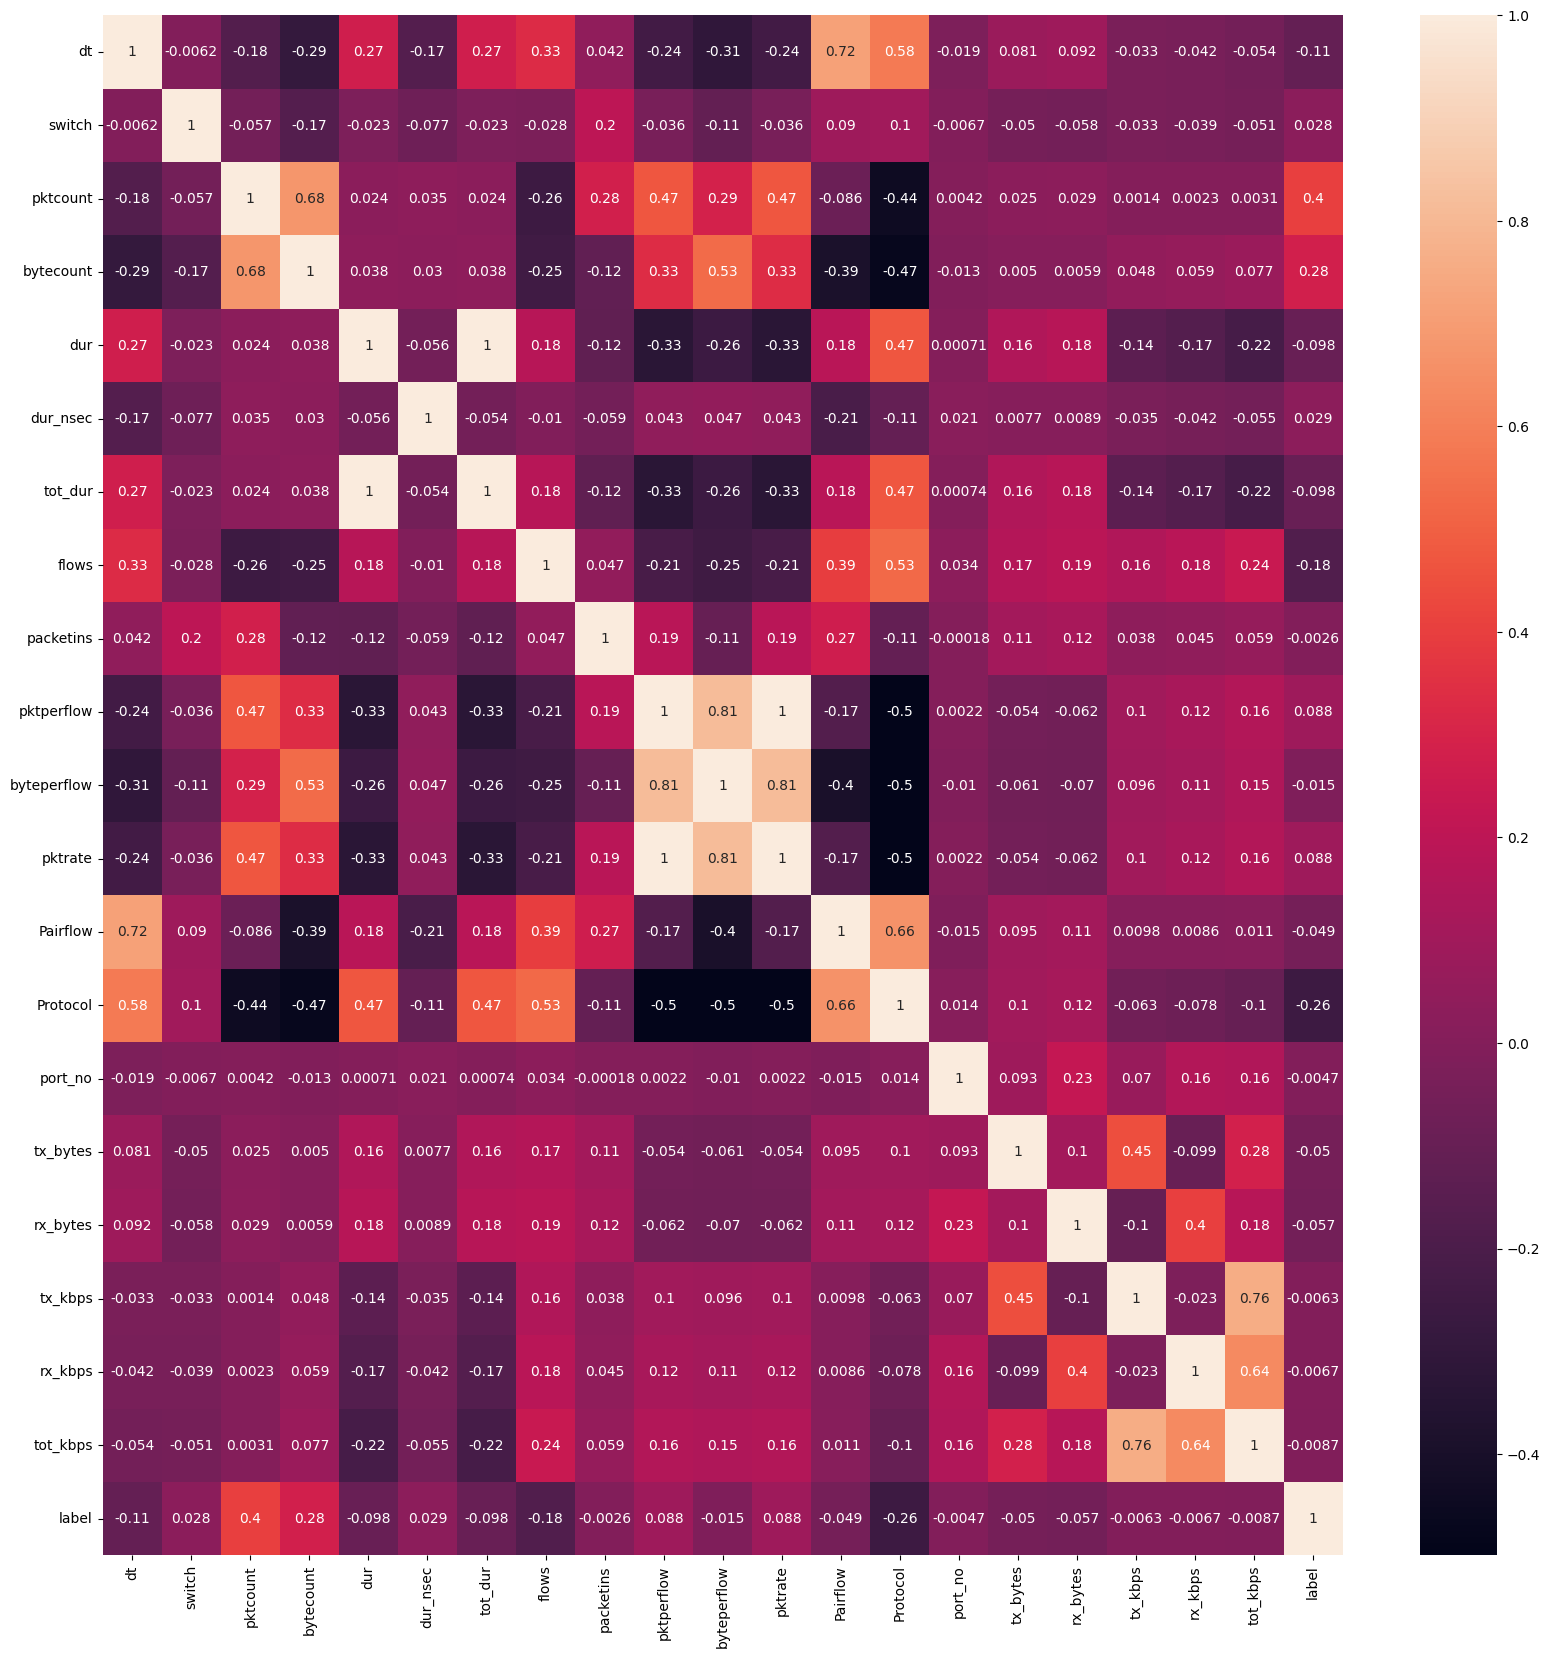

In [279]:
cor = df_altered.corr()
plt.figure(figsize=(20, 20))
plt.label = "Correlation of all the features"
sns.heatmap(cor, annot=True)

In [280]:
df_altered.columns = df_altered.columns.astype(str)

In [281]:
df_altered.columns

Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps',
       'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [282]:
%matplotlib inline


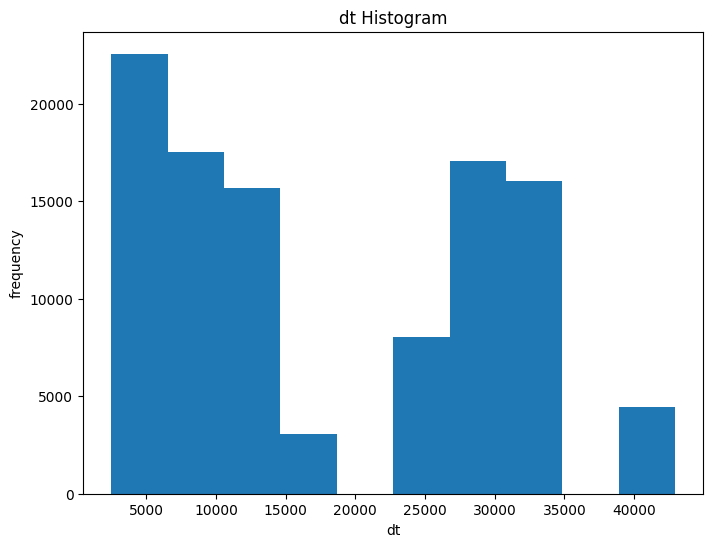

<Figure size 640x480 with 0 Axes>

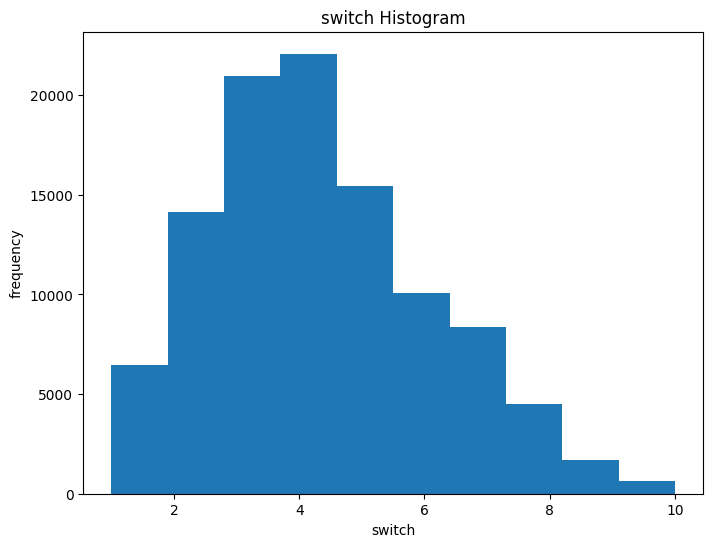

<Figure size 640x480 with 0 Axes>

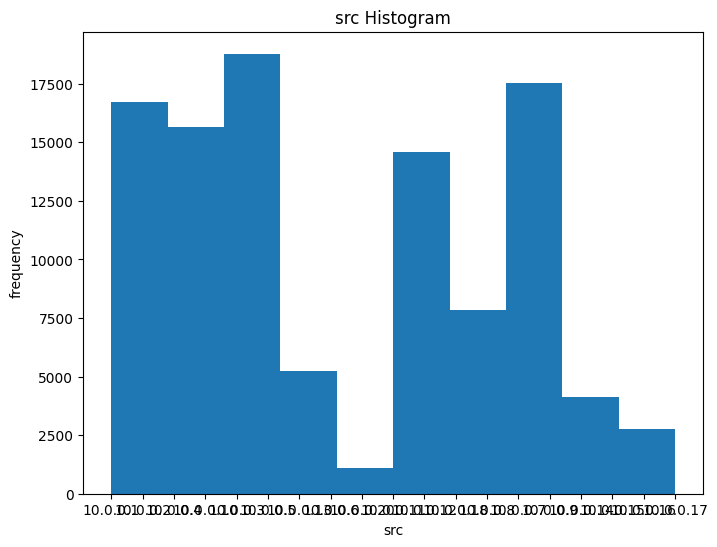

<Figure size 640x480 with 0 Axes>

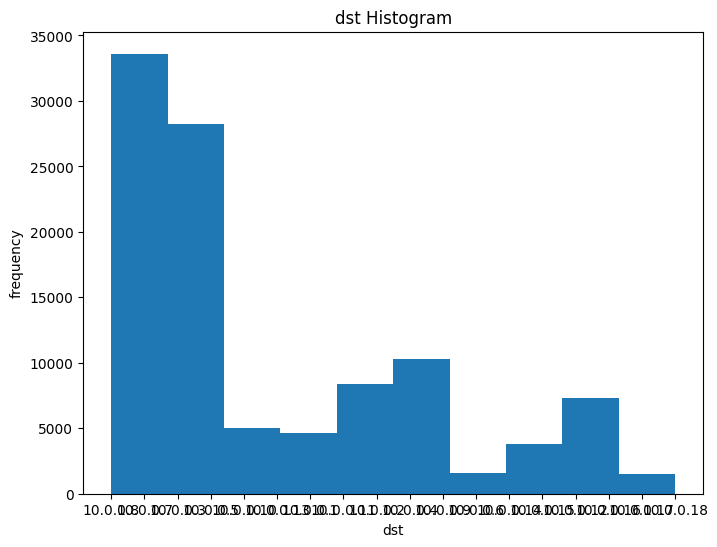

<Figure size 640x480 with 0 Axes>

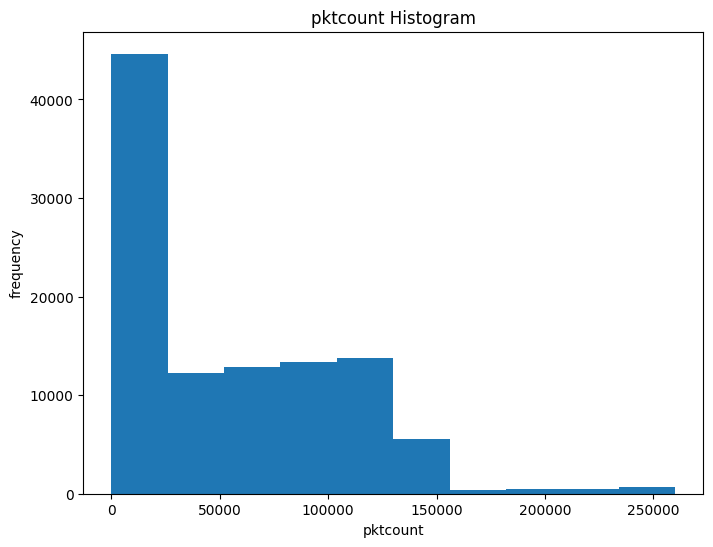

<Figure size 640x480 with 0 Axes>

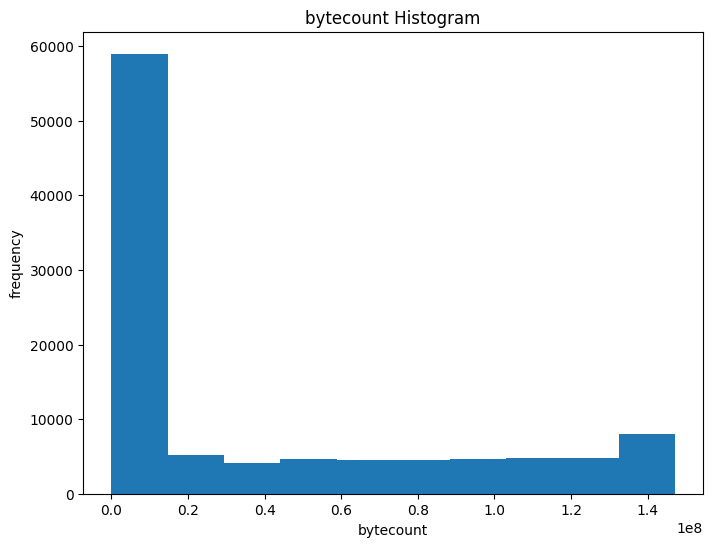

<Figure size 640x480 with 0 Axes>

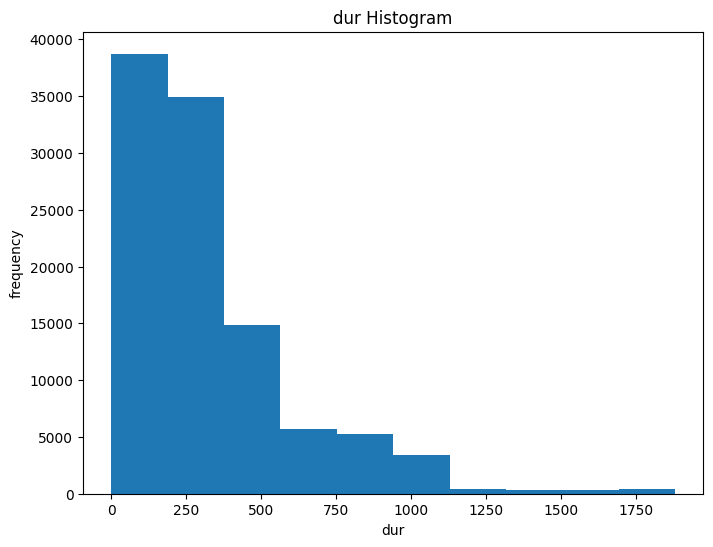

<Figure size 640x480 with 0 Axes>

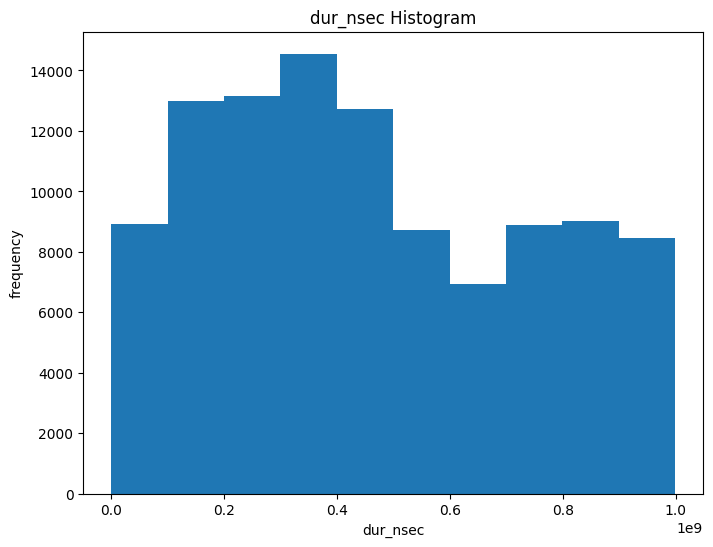

<Figure size 640x480 with 0 Axes>

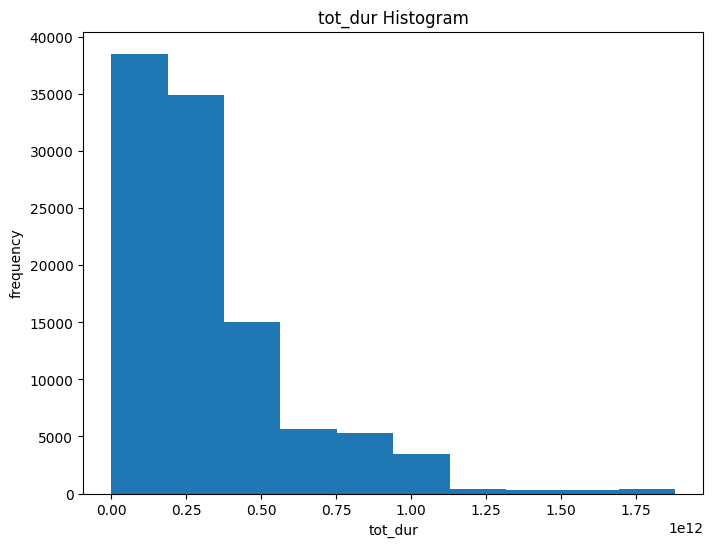

<Figure size 640x480 with 0 Axes>

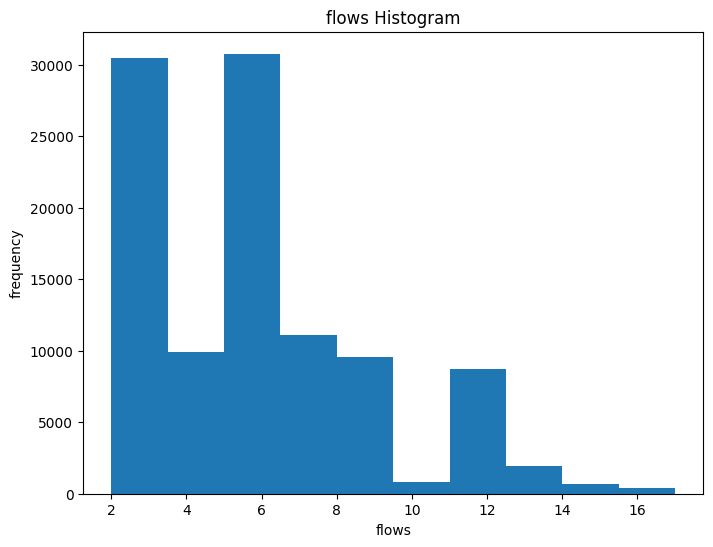

<Figure size 640x480 with 0 Axes>

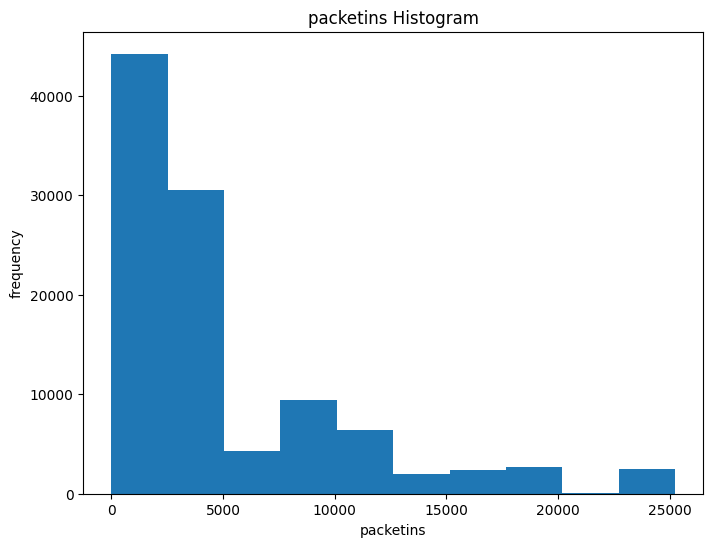

<Figure size 640x480 with 0 Axes>

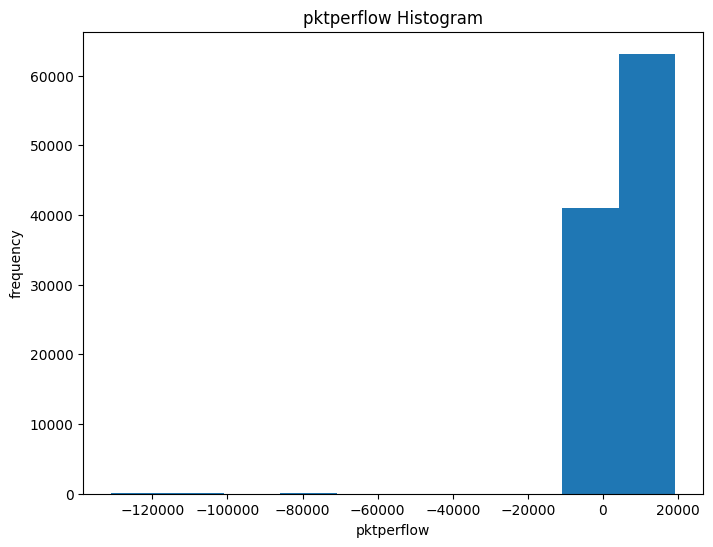

<Figure size 640x480 with 0 Axes>

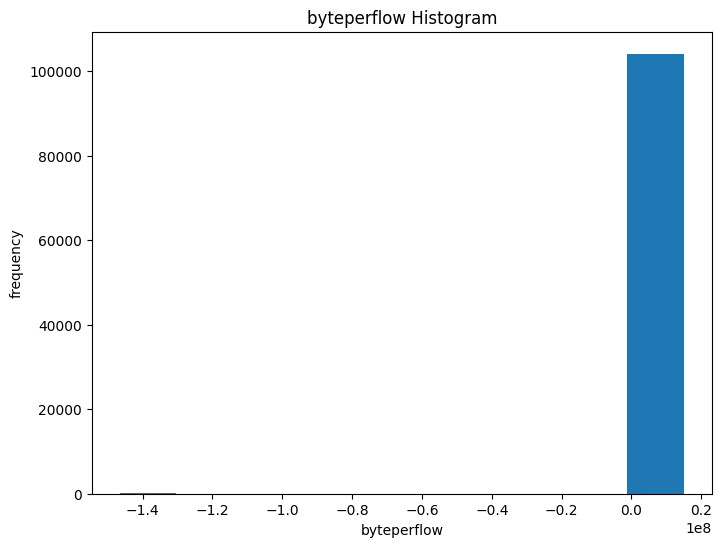

<Figure size 640x480 with 0 Axes>

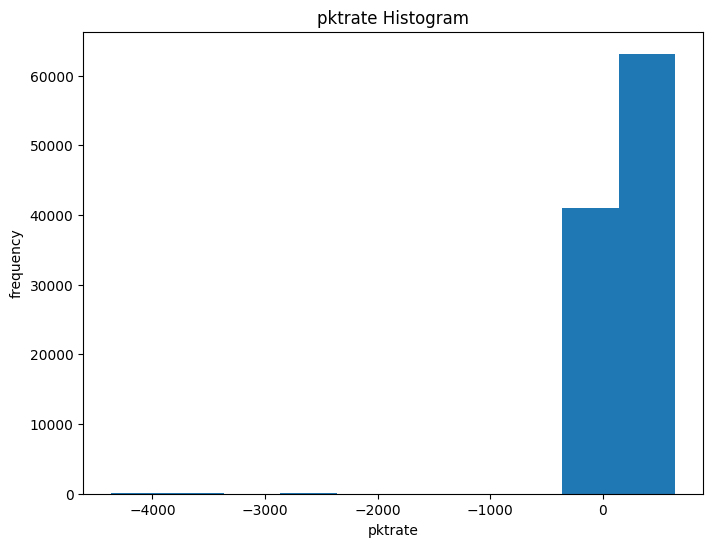

<Figure size 640x480 with 0 Axes>

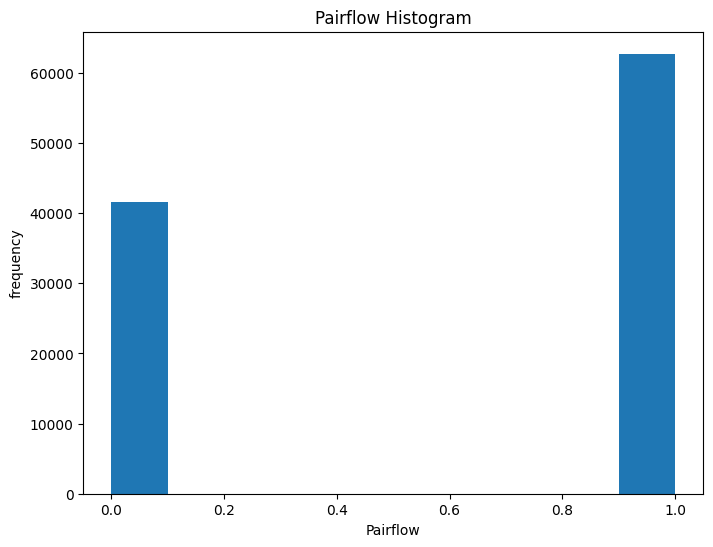

<Figure size 640x480 with 0 Axes>

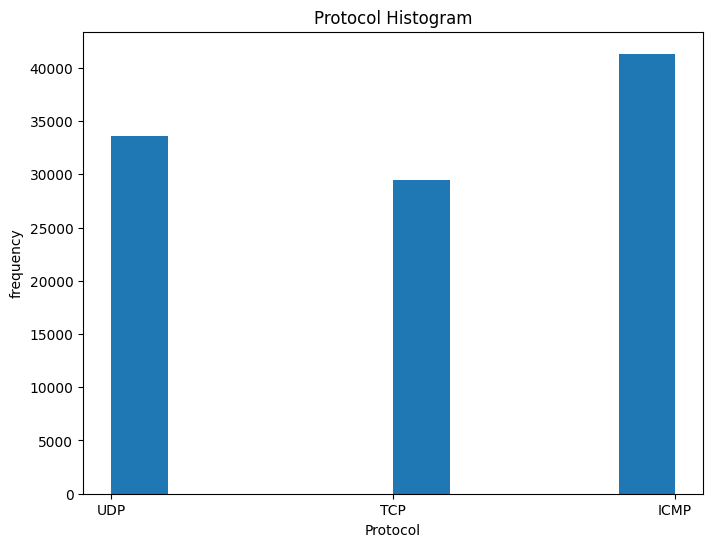

<Figure size 640x480 with 0 Axes>

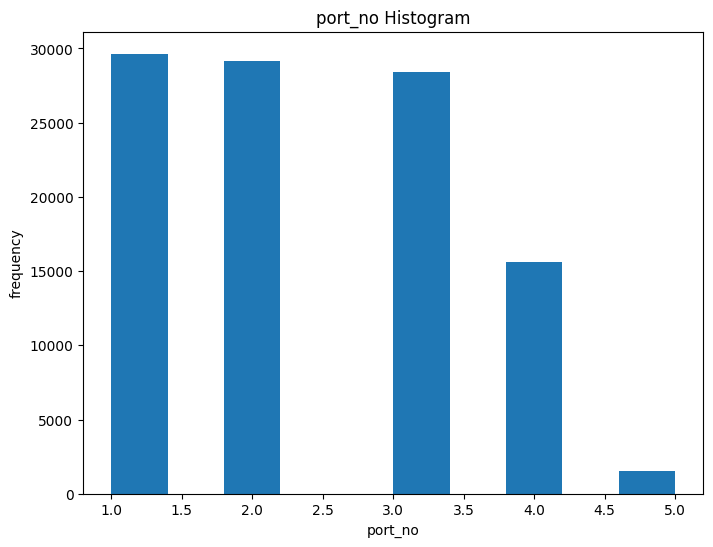

<Figure size 640x480 with 0 Axes>

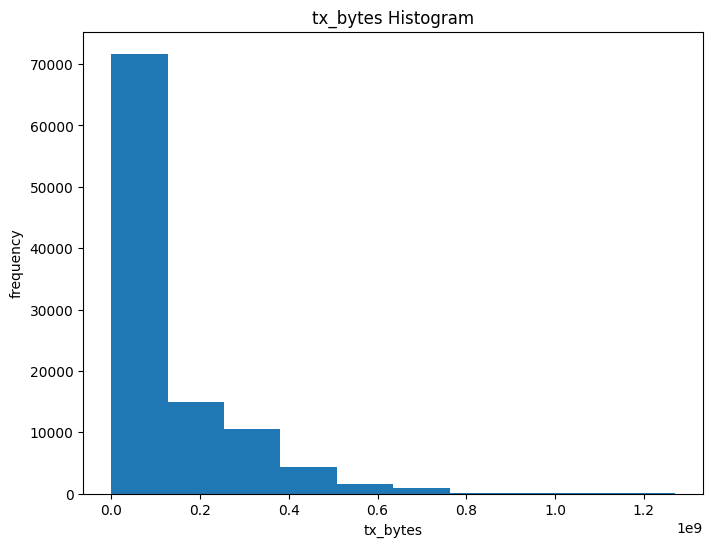

<Figure size 640x480 with 0 Axes>

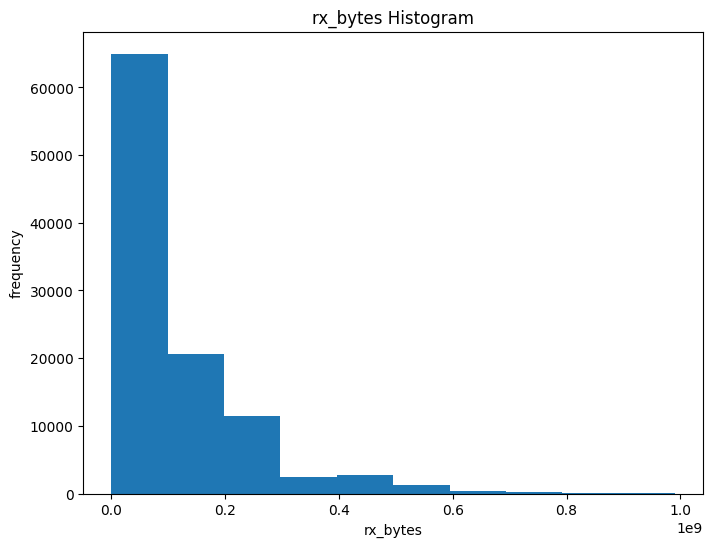

<Figure size 640x480 with 0 Axes>

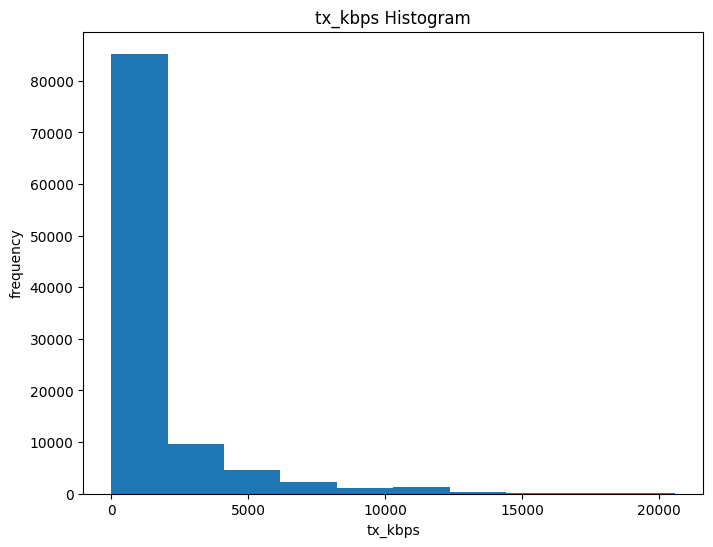

<Figure size 640x480 with 0 Axes>

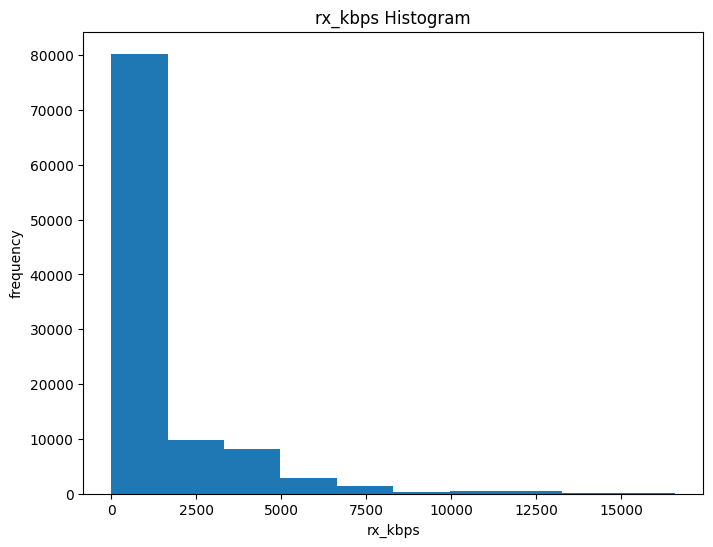

<Figure size 640x480 with 0 Axes>

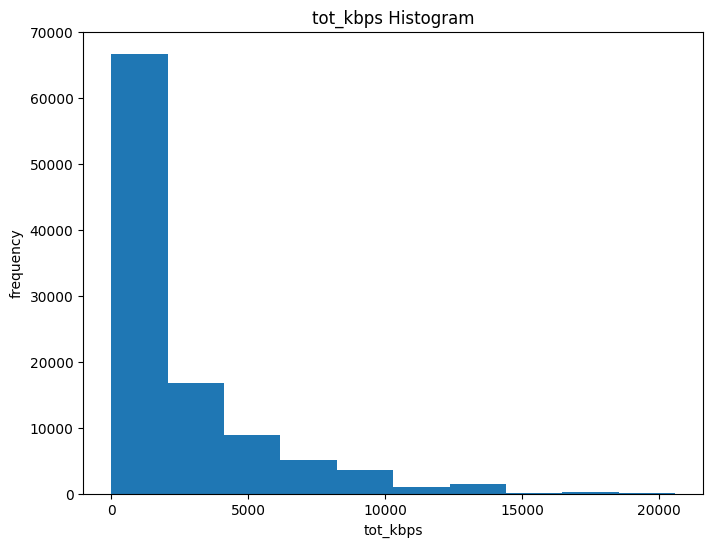

<Figure size 640x480 with 0 Axes>

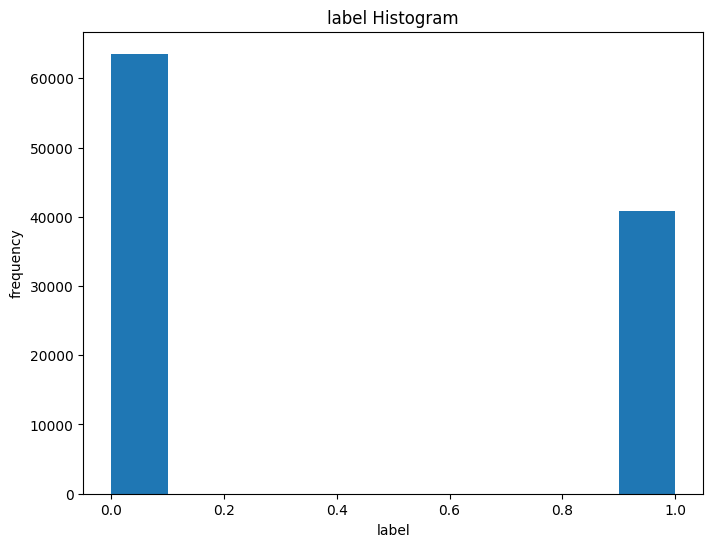

<Figure size 640x480 with 0 Axes>

In [8]:
for i in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel("frequency")
    plt.title(i + " Histogram")
    plt.show()
    plt.savefig("./imgs/"+i+"_histogram.png")  # Uncomment this line to save the plots as images
   

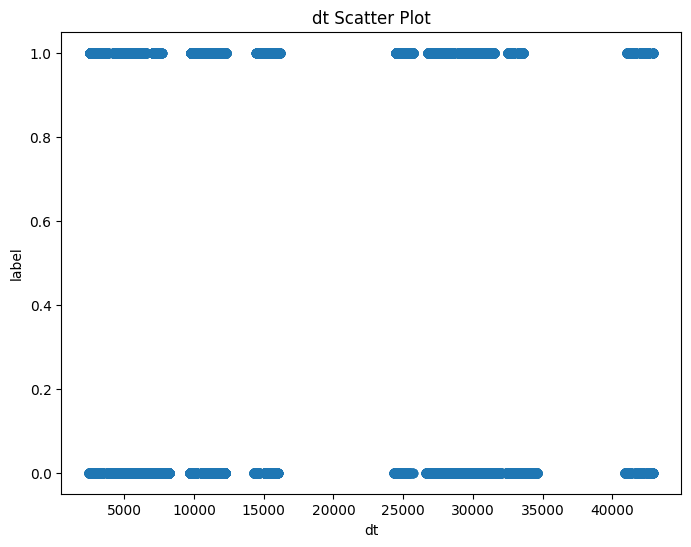

<Figure size 640x480 with 0 Axes>

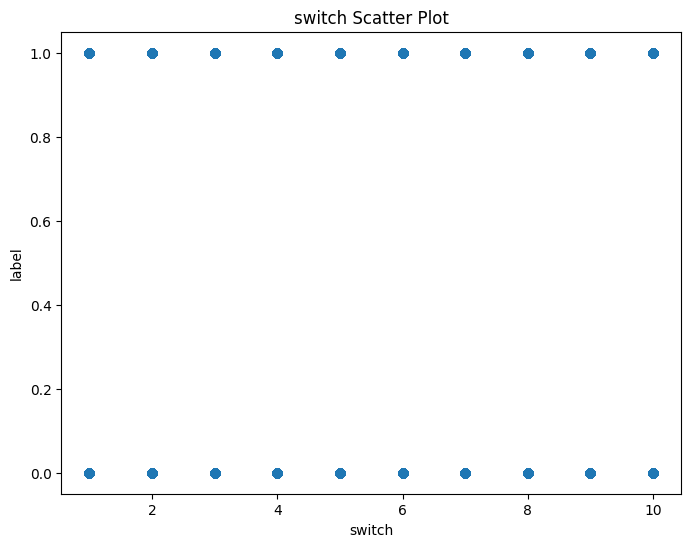

<Figure size 640x480 with 0 Axes>

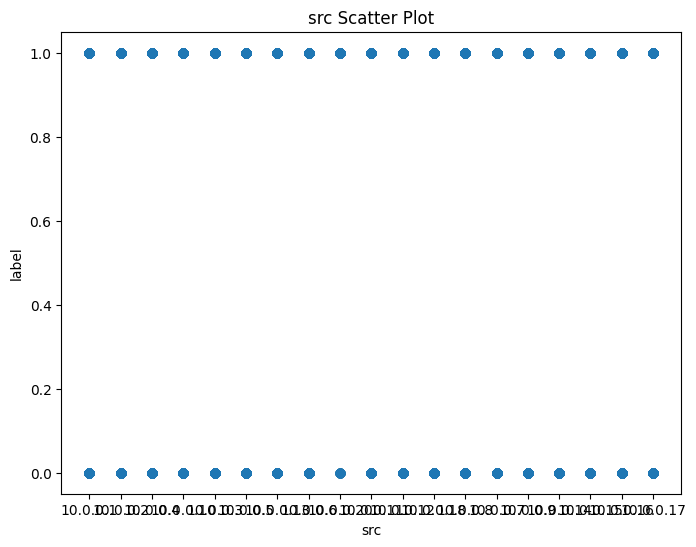

<Figure size 640x480 with 0 Axes>

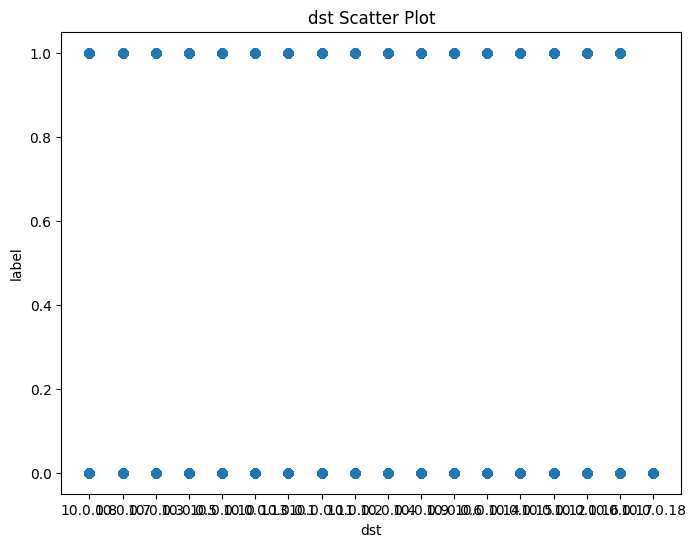

<Figure size 640x480 with 0 Axes>

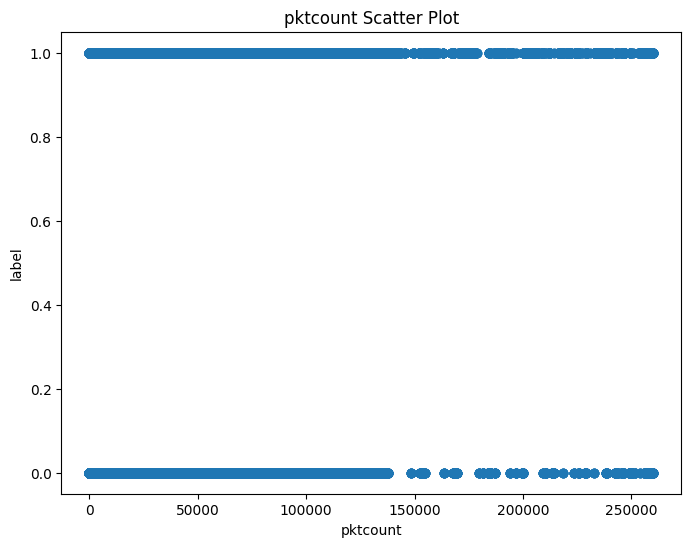

<Figure size 640x480 with 0 Axes>

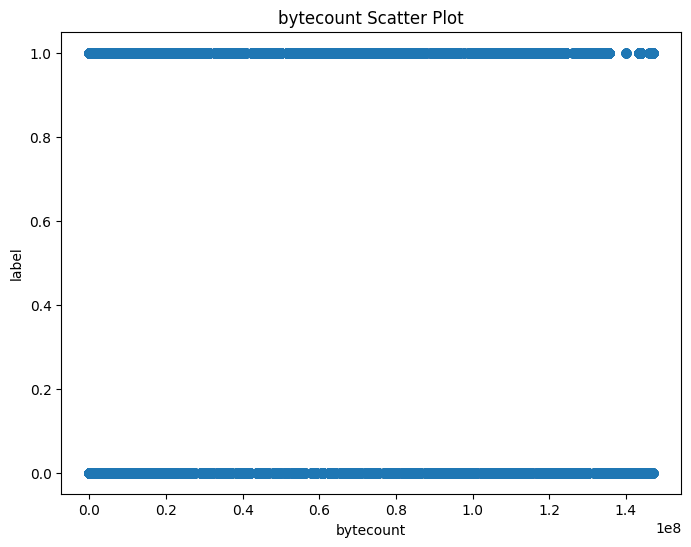

<Figure size 640x480 with 0 Axes>

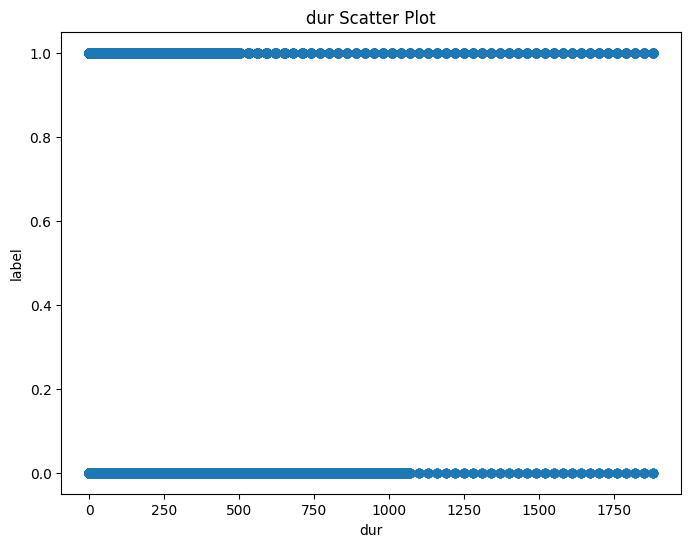

<Figure size 640x480 with 0 Axes>

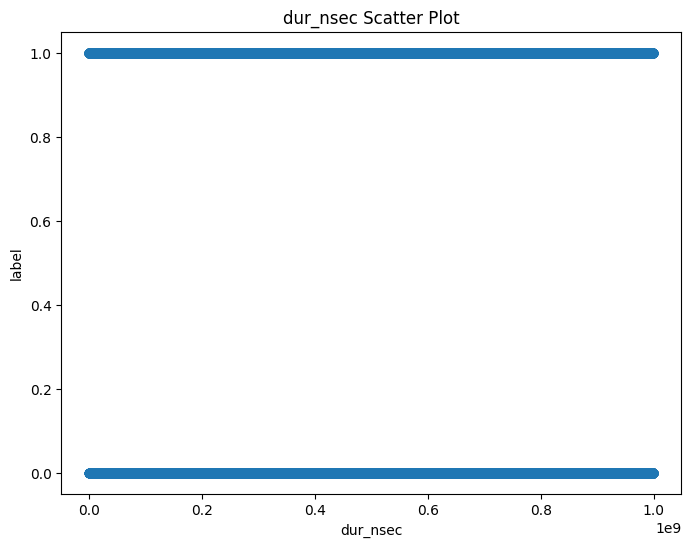

<Figure size 640x480 with 0 Axes>

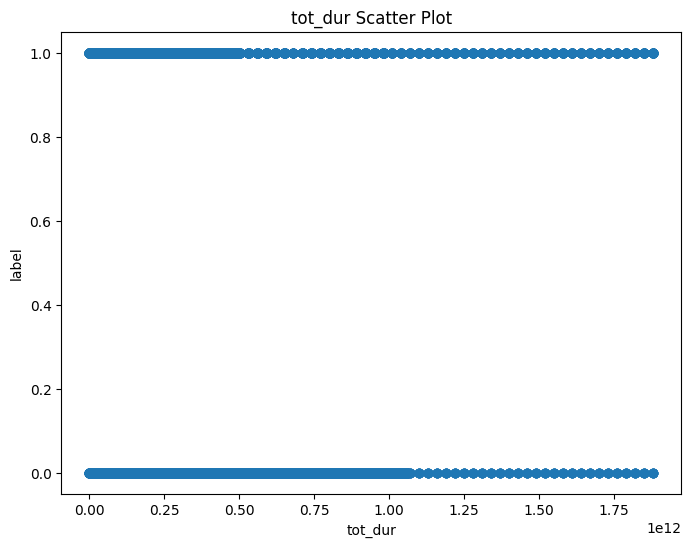

<Figure size 640x480 with 0 Axes>

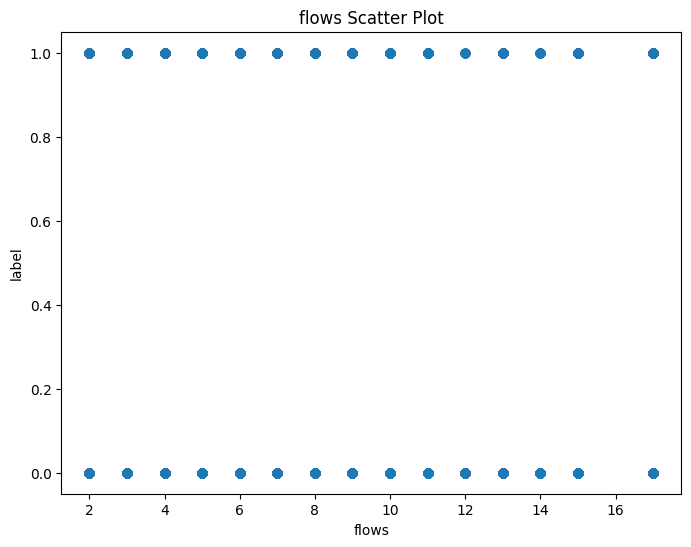

<Figure size 640x480 with 0 Axes>

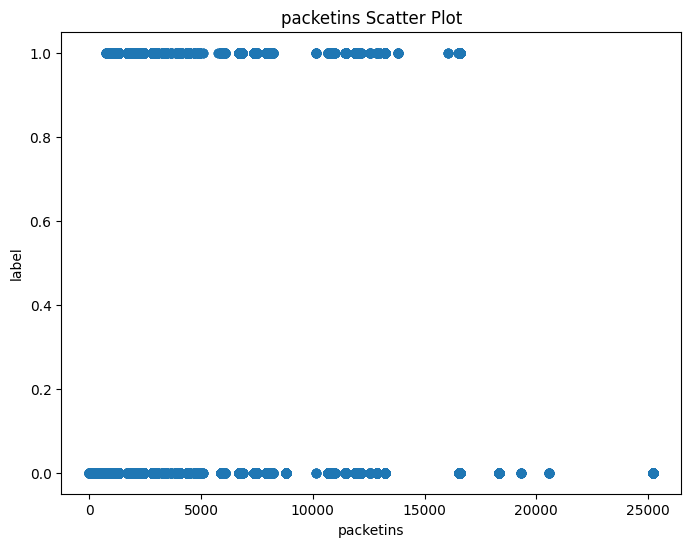

<Figure size 640x480 with 0 Axes>

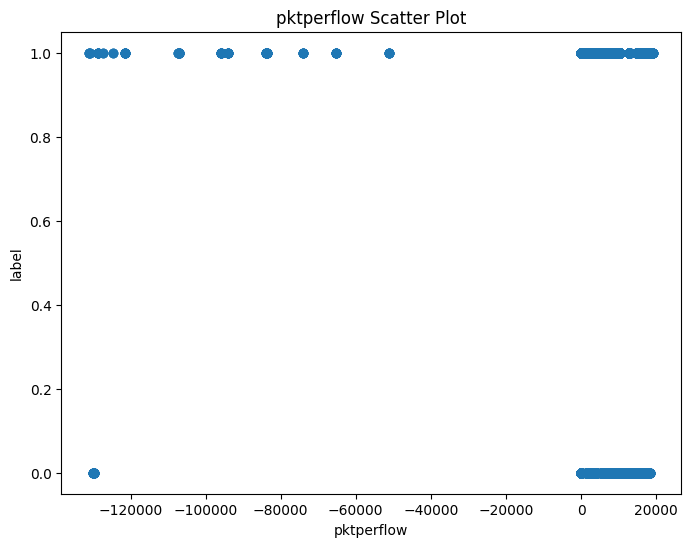

<Figure size 640x480 with 0 Axes>

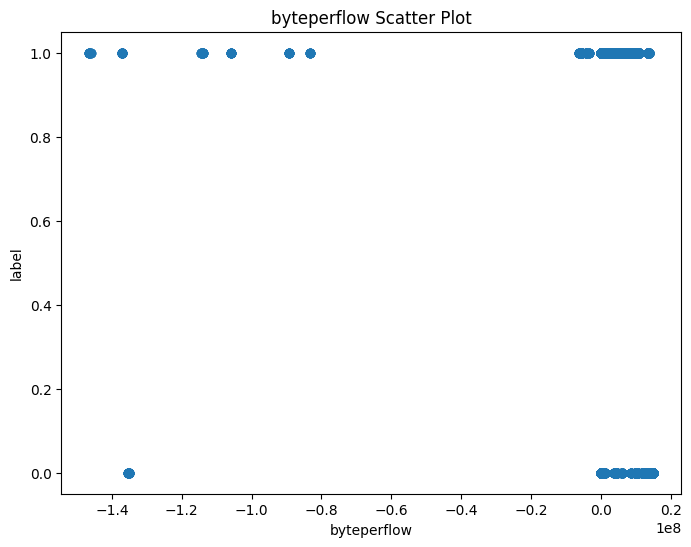

<Figure size 640x480 with 0 Axes>

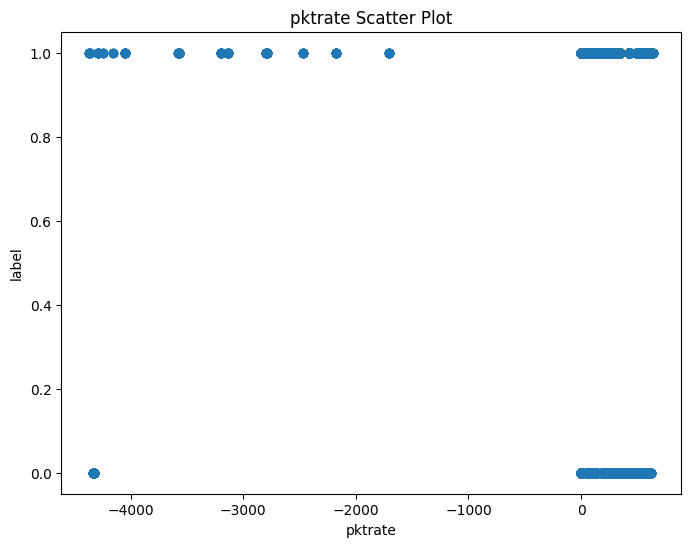

<Figure size 640x480 with 0 Axes>

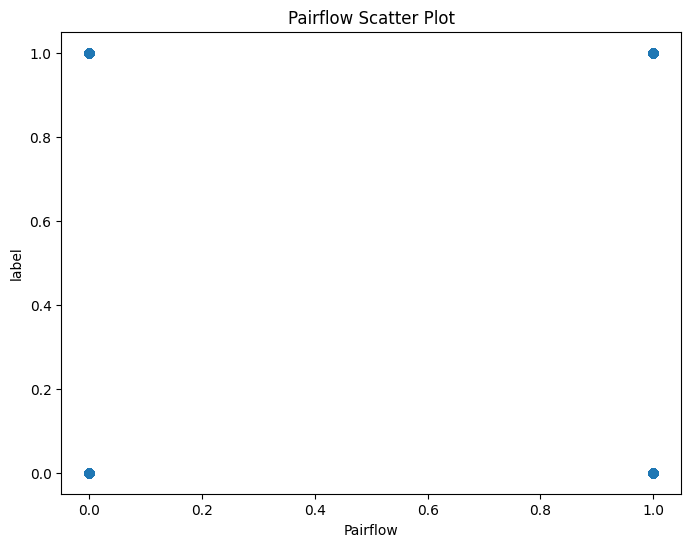

<Figure size 640x480 with 0 Axes>

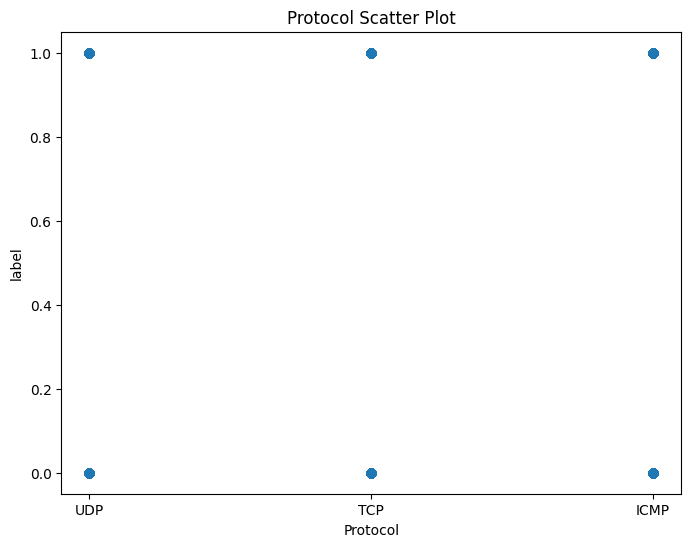

<Figure size 640x480 with 0 Axes>

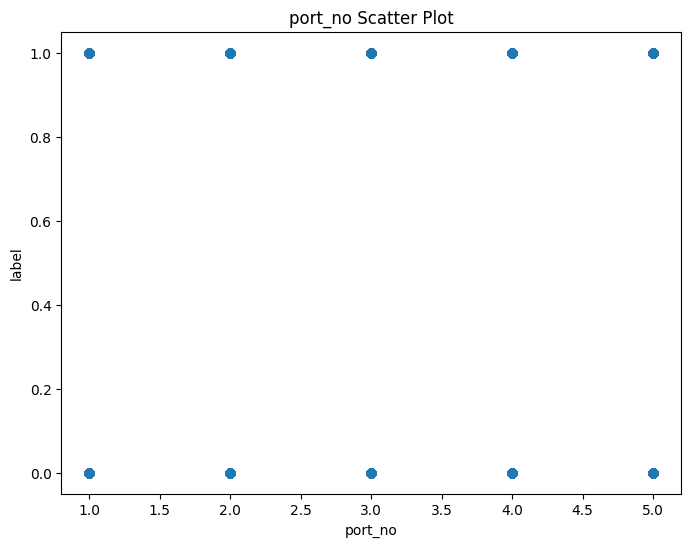

<Figure size 640x480 with 0 Axes>

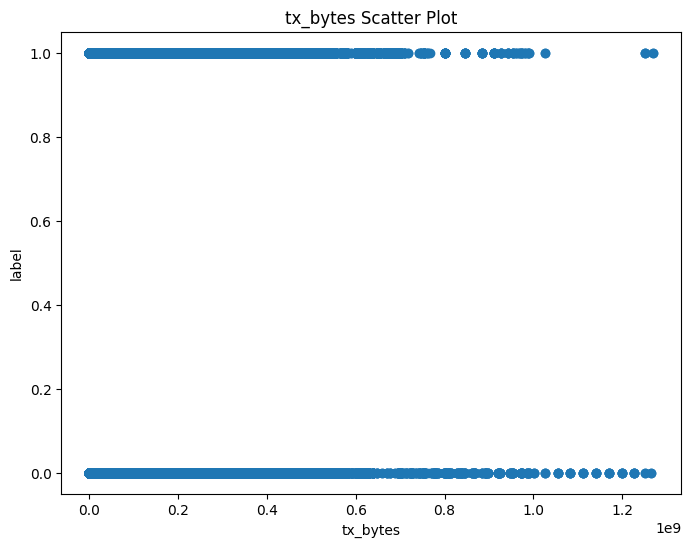

<Figure size 640x480 with 0 Axes>

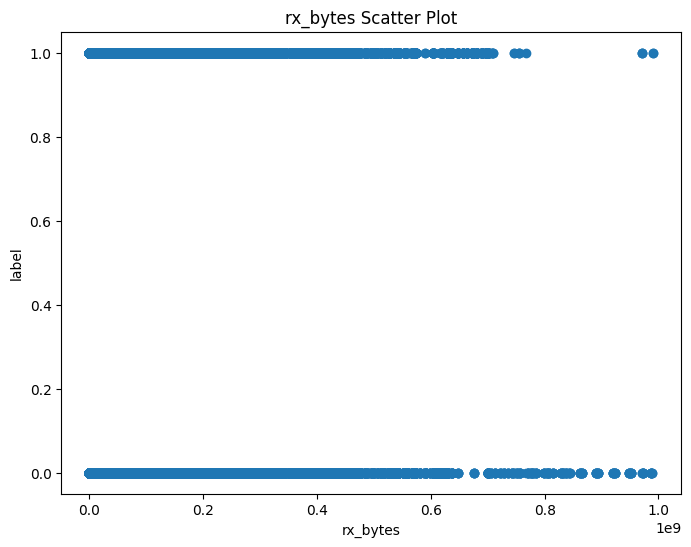

<Figure size 640x480 with 0 Axes>

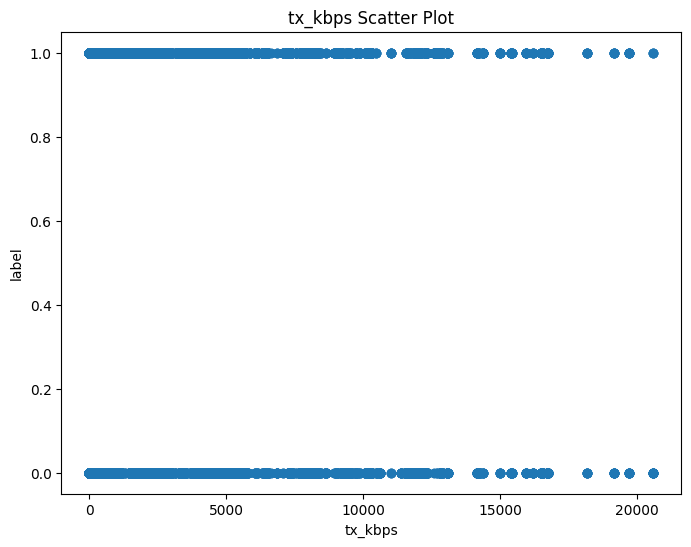

<Figure size 640x480 with 0 Axes>

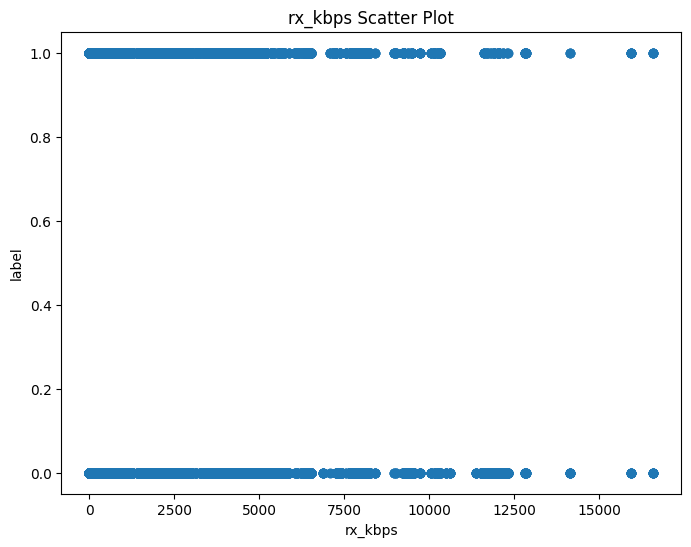

<Figure size 640x480 with 0 Axes>

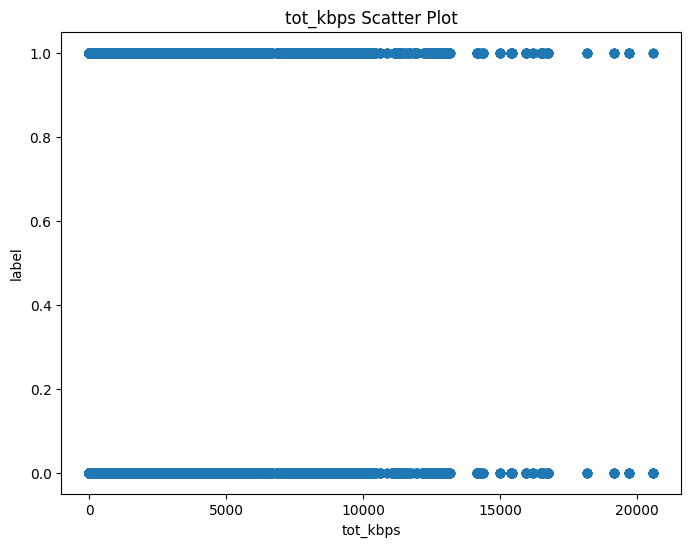

<Figure size 640x480 with 0 Axes>

In [9]:
for i in df.columns[0:-1]:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[i], df['label'])
    plt.xlabel(i)
    plt.ylabel('label')
    plt.title(i + " Scatter Plot")
    plt.show()
    plt.savefig("./imgs/"+i+"_scatter_plot.png")  # Uncomment this line to save the plots as images

In [285]:
df_altered.columns[0:-1]

Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps',
       'rx_kbps', 'tot_kbps'],
      dtype='object')

In [286]:
cols_with_na = [cols for cols in df_altered.columns if df_altered[cols].isna().any()]
cols_with_na

['rx_kbps', 'tot_kbps']

In [287]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy="mean")

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X = df_altered.drop('label', axis=1)
y = df_altered['label']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size=0.3)

In [290]:
X_train_imputed = pd.DataFrame(my_imputer.fit_transform(X_train[cols_with_na]))
X_valid_imputed = pd.DataFrame(my_imputer.fit_transform(X_valid[cols_with_na]))

In [291]:
X_train_imputed.index = X_train.index
X_valid_imputed.index = X_valid.index

In [292]:
X_train_imputed.columns = cols_with_na
X_valid_imputed.columns = cols_with_na

In [293]:
X_train = X_train.drop(cols_with_na, axis=1)
X_valid = X_valid.drop(cols_with_na, axis=1)

In [294]:
X_train = pd.concat([X_train, X_train_imputed], axis=1)
X_valid = pd.concat([X_valid, X_valid_imputed], axis=1)

In [295]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestRegressor(n_estimators=200, n_jobs=4)
model = model.fit(X_train, y_train)

In [296]:
preds = model.predict(X_valid)

In [297]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_valid, preds)
mae

0.0002962880143112701

In [298]:
y_valid = np.array(y_valid).astype(int)
preds = np.array(preds).astype(int)

Accuracy: 99.56235624840276 %
Precision: 1.0
Recall: 0.9886193719887024
F1-score: 0.9942771210159155
Confusion Matrix:


<Axes: >

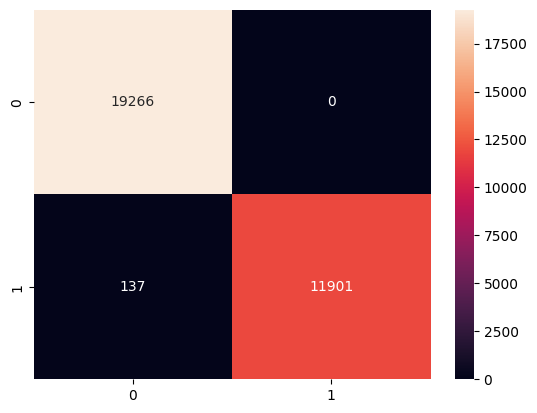

In [299]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_valid, preds)
precision = precision_score(y_valid, preds)
recall = recall_score(y_valid, preds)
f1 = f1_score(y_valid, preds)
conf_matrix = confusion_matrix(y_valid, preds).astype(int)

# Print the evaluation metrics
print("Accuracy:", accuracy*100, "%")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True, fmt=".0f")

In [300]:
import joblib
filename = "random_forest_model.joblib"
joblib.dump(model, filename)

['random_forest_model.joblib']